# Linear Regression

## Model Assumptions

We assume that the target variable $y$ is given by

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon $$

where $p$ is the number of predictors/features, $x_i$ is the value of the $i^{\text{th}}$ predictor, and $\epsilon$ is a random variable with $E(\epsilon)=0$ and $V(\epsilon)=\sigma^2$. If we write $\mathbf{\beta} = (\beta_0, \beta_1, \ldots , \beta_p)^T$ and $\mathbf{x} = (1,x_1, x_2, \cdots , x_p)^T$, we can express the above equation

$$y = \mathbf{\beta}^T \mathbf{x} + \epsilon.$$

We use the following notation: we let $x^{(i)}$ represent a single observation in the training data and $x^{(i)}_j$ is the value of the $j^{\text{th}}$ feature for the $i^{\text{th}}$ observation in the training data. If we have $n$ independent observations $\left\{(x^{(i)}, y^{(i)})\right\}_{i=1}^n$,

$$ y^{(1)} = \beta_0 + \beta_1 x_1^{(1)} + \beta_2 x_2^{(1)} + \ldots + \beta_p x_p^{(1)} + \epsilon_1 $$
$$ y^{(2)} = \beta_0 + \beta_1 x_1^{(2)} + \beta_2 x_2^{(2)} + \ldots + \beta_p x_p^{(2)} + \epsilon_2 $$
$$ \vdots \qquad \vdots$$
$$ y^{(n)} = \beta_0 + \beta_1 x_1^{(n)} + \beta_2 x_2^{(n)} + \ldots + \beta_p x_p^{(n)} + \epsilon_n $$

we can represent this more compactly by

$$\mathbf{y} = X \beta + \mathbf{\epsilon}$$

where $\mathbf{y} = (y^{(1)}, y^{(2)}, \ldots , y^{(n)})^T$,

$$X = \begin{bmatrix} 1 & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_p\\
                      1 & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_p\\
                      \vdots & \vdots & \vdots & \vdots & \vdots \\
                      1 & x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_p \end{bmatrix},$$
                      
and $\mathbf{\epsilon} = (\epsilon_1, \epsilon_2, \ldots , \epsilon_n)^T$. Note that the rows of the matrix $X$ are the transpose of the observations $x^{(i)}$ with a $1$ appended for the bias term $\beta_0$. We assume the $E(\mathbf{\epsilon}) = \mathbf{0}$ and $\text{Cov}(\mathbf{\epsilon}) = \sigma^2 I$. 

## Fitting the model

We wish use the training data to find an estimate $\mathbf{\hat{\beta}}$ of the parameter vector $\mathbf{\beta}$. What criterion do we use to determine whether $\mathbf{\hat{\beta}}$ is a good estimate of $\mathbf{\beta}$ given the training observations? The performance measure we will start with is residual sum of squares (RSS). If we find an estimate of the parameter vector, we can produce a prediction of the model by

$$ \widehat{y^{(i)}} = \mathbf{\widehat{\beta}}^T \mathbf{x^{(i)}}$$ 

and evaluate how it differs from the actual value

$$ \left(y^{(i)} - \widehat{y^{(i)}}\right)^2 =  \left(y^{(i)} - \mathbf{\widehat{\beta}}^T \mathbf{x^{(i)}}\right)^2$$

We square the difference to make all values positive (we don't want negative and positive differences to cancel out). We don't take the absolute value because we will want to minimize this cost function. The absolute value function is not differentiable which would make finding the minimum value of the cost function more difficult. This is a "cost" function in the following sense: if the difference between the actual and predicted value is large (that is, the prediction is "bad"), we incur a cost. So, a large value of the cost function means that the model is making a lot of "bad" predictions. We want to minimize these squared differences (or "errors") across all of the observations in the training data. We want to minimize the residual sum of squares:

$$ \text{RSS}(\mathbf{\beta}) = \displaystyle\sum_{i=1}^n \left(y^{(i)} - \mathbf{\widehat{\beta}}^T \mathbf{x^{(i)}}\right)^2$$

Note that we treat RSS as a function of the parameter vector $\mathbf{\beta}$ and we want to minimize the RSS with respect to $\mathbf{\beta}$. If we take the average of these squared differences (divide the RSS by the number of observations) we get the mean squared error, which is another measure of performance. We can express RSS using matrices:

$$\text{RSS}(\mathbf{\beta}) = \left( \mathbf{y} - X \beta \right)^T \left(\mathbf{y} - X \beta \right)$$

We can use matrix differentiation to find the minimum of $\text{RSS}(\mathbf{\beta})$. These [slides](https://www.comp.nus.edu.sg/~cs5240/lecture/matrix-differentiation.pdf) were help in figuring out some helpful formulas. Note that the particular layout you choose to work with will change some of the results. Some texts use different layouts and they don't make it clear what layout they are using, so beware. Here are some results we will use.

Let $\mathbf{u}, \mathbf{v}$ be vectors and let $A$ be a matrix. In general,

$$\left( \displaystyle\frac{\partial \mathbf{u}}{\partial \mathbf{v}}\right)_{ij} = \displaystyle\frac{\partial \mathbf{u}_j}{\partial \mathbf{v}_i}$$

Note that the indices have switched - this is the denominator layout. Though it is not mentioned explicitly, the textbooks *Elements of Statistical Learning* and *Machine Learning: A Probabilistic Perspective* seem to be using the denominator layout. Here is one particular formula we will use.

$$ \displaystyle\frac{\partial \mathbf{u}^T \mathbf{u}}{\partial \mathbf{u}} = 2 \mathbf{u}$$

This is the derivative of a scalar with respect to a vector. Using the denominator layout results in output which is a column vector. Since $\mathbf{u}^T \mathbf{u} = \displaystyle\sum_{k=1}^p u_k^2$,

$$\left(\displaystyle\frac{\partial \displaystyle\sum_{k=1}^p u_k^2}{\partial \mathbf{u}}\right)_j= \left(\displaystyle\frac{\partial \displaystyle\sum_{k=1}^p u_k^2}{\partial u_j} \right) =  2u_j$$

Another useful result is the following:

$$ \displaystyle\frac{\partial A \mathbf{u} }{\partial \mathbf{u} } = A^T$$

Note that 

$$A \mathbf{u} = \begin{bmatrix} \displaystyle\sum_k a_{1,k}u_k \\ \displaystyle\sum_k a_{2,k}u_k\\ \vdots \\ \displaystyle\sum_k a_{n,k}u_k \end{bmatrix}$$

The $i,j$ entry of the derivative is 

$$\displaystyle\frac{\partial \displaystyle\sum_k a_{j,k}u_k}{\partial u_i} = a_{j,i}$$

Thus, the derivative is the transpose of the matrix $A$. Finally, lets return back to the derivative of $\text{RSS}(\beta)$. Think of $\text{RSS}(\beta)$ as a composition of functions $f \left( \mathbf{y} - X \beta \right)$, where $f(\mathbf{z}) = \mathbf{z}^T\mathbf{z}$. Using the above differentiation rules plus the chain rule, we have

$$\displaystyle\frac{\partial \text{RSS}(\beta) }{\partial \beta} = 2\left(\mathbf{y} - X \beta \right)(-X^T).$$

Setting this equal to $0$ and solving for $\beta$, we find that

$$2(-X^T)\left(\mathbf{y} - X \beta \right) = 0$$

$$X^TX \beta = X^T \mathbf{y}$$

$$\widehat{\beta} = \left(X^TX\right)^{-1} X^T \mathbf{y}$$

If $X$ has full column rank, then $X^TX$ is positive definite and therefore is invertible. We should verify that this solution actually results in the global minimum. 

$$\displaystyle\frac{\partial^2 \text{RSS}(\beta) }{\partial \beta \partial \beta^T } = \displaystyle\frac{\partial \left(-2X^T\left(\mathbf{y} - X \beta \right)\right)}{\partial \beta^T} = -2 (-X^TX) = 2X^TX$$

Since the Hessian matrix is positive definite, the critical point at $\widehat{\beta}$ is indeed the location of the global minimum of the RSS cost function.


## Example: Assume Gaussian noise

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from numpy.random import normal, uniform 
from numpy.random import multivariate_normal as mvn
import plotly.graph_objects as go

For this example, we make the further assumption that the additive noise is normally distributed. This additional assumption allows one to further understand some sampling properties of $\mathbf{\widehat{\beta}}$.

In [ ]:
beta_0, beta_1, beta_2 = 3.0, 5.5, 10.0 # set parameters
x1 = normal(25,5,100)
x2= uniform(0,10,100)
Y_determin = beta_0 + beta_1*x1 + beta_2*x2
Y = Y_determin + mvn(np.zeros(100), 10.0*np.eye(100)) # simulate sample data with Gaussian noise
squared_resids = (Y-Y_determin)**2

Scatter plot of the simulated data

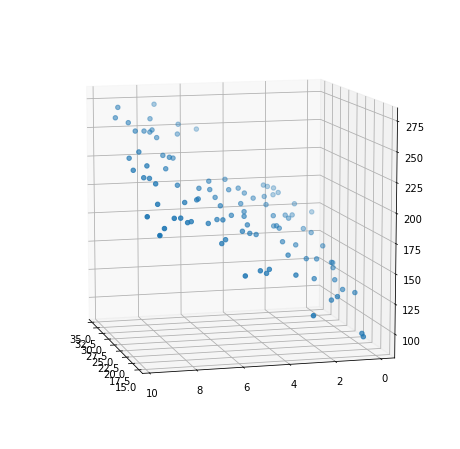

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,165)
ax.scatter(x1, x2, Y)
plt.show()
plt.close()

Plot the underlying deterministic component which generated the simulated training data

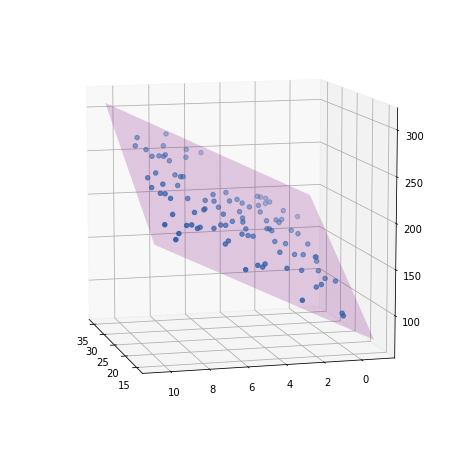

In [ ]:
z1, z2 = np.meshgrid(np.linspace(np.min(x1)-1.0, np.max(x1)+1.0, 100),
                     np.linspace(np.min(x2)-1.0, np.max(x2)+1.0, 100))
grid = np.c_[z1.ravel(), z2.ravel()]
Z = beta_0 + beta_1*z1 + beta_2*z2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,165)
ax.scatter(x1, x2, Y)
ax.plot_surface(z1, z2, Z, color='purple', alpha=0.2)
plt.show()
plt.close()

Use the results above to compute $\widehat{\beta}$, the estimate of the parameter vector $\beta$

In [ ]:
X = np.c_[np.ones(100), x1,x2]
Betas = (np.linalg.inv((X.T)@X))@(X.T)@(Y)

In [ ]:
Betas

array([ 2.85982399,  5.45943214, 10.15809457])

Note that the estimate of the bias term is not great, but the estimates of the other parameters are very close to the true values. We will see later that it is possible to construct confidence intervals for the parameters under the additional assumption of additive Gaussian noise. Plot the deterministic component using estimate $\widehat{\beta}$

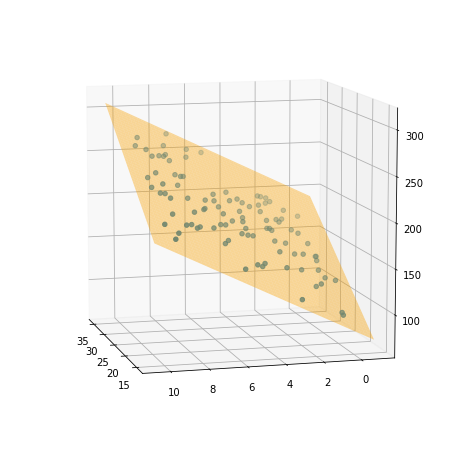

In [ ]:
Y_hat = Betas[0] + Betas[1]*x1+Betas[2]*x2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,165)
ax.scatter(x1, x2, Y)
Z = Betas[0] + Betas[1]*z1+Betas[2]*z2
ax.plot_surface(z1, z2, Z, color='orange', alpha=0.4)
plt.show()
plt.close()

### Sampling properties of $\widehat{\beta}$

The estimator $\mathbf{\widehat{\beta}}$ is an unbiased estimator of $\mathbf{\beta}$.

\begin{align*}
E\left(\mathbf{\widehat{\beta}}\right) & = E_X\left(E_{Y|X}\left(\left(X^TX\right)^{-1}X^Ty\right)\right)\\
& = E_X\left(\left(X^TX\right)^{-1}X^TE_{Y|X}\left(y\right)\right) \text{since we can treat } X \text{ as fixed}\\
& = E_X\left(\left(X^TX\right)^{-1}X^TX\beta\right) \text{ since } E_{Y|X}(y) = E_{Y|X}(X\beta + \epsilon) = X\beta\\
& = E_X(\beta) \text{ after cancellation}\\
& = \beta
\end{align*}

Again, by conditioning on $X$ (we assume that the training data is fixed) and using the result $\text{Var}(XA) = X\text{Var}(A)X^T$ where $A$ is a random matrix and $X$ is fixed, we have

\begin{align*}
\text{Var}_{Y|X}\left(\mathbf{\widehat{\beta}}\right) & = \text{Var}_{Y|X}\left(\left(X^TX\right)^{-1}X^Ty\right)\\
& = \left(X^TX\right)^{-1}X^T \text{Var}_{Y|X}(y) \left(\left(X^TX\right)^{-1}X^T\right)^T\\
& = \left(X^TX\right)^{-1}X^T \left(\left(X^TX\right)^{-1}X^T\right)^T \sigma^2 \text{ since } \text{Var}_{Y|X}(X\beta+\epsilon) = V(\epsilon) = \sigma^2\\
& = \left(X^TX\right)^{-1}X^T X \left(X^TX\right)^{-T} \sigma^2 \\
& = \left(X^TX\right)^{-1}\sigma^2 \text{ since } \left(X^TX\right)^{-1} = \left(X^TX\right)^{-T} \text{ is a symmetric matrix}
\end{align*}

We can estimate $\sigma^2$ by

$$\widehat{\sigma^2} = \frac{1}{n-p-1} \displaystyle\sum_{i=1}^n (y_i-\widehat{y_i})^2$$

Furthermore, conditioning on $X,\beta$

$$\widehat{\mathbf{\beta}} \sim N\left(\beta, \left(X^TX\right)^{-1}\sigma^2\right)$$

since multiplying a Gaussian by a matrix of fixed values and adding a fixed vector to this product results in a random variable which is still normally distributed.

$$\widehat{\mathbf{\beta}} =  \left(X^TX\right)^{-1}X^Ty = \left(X^TX\right)^{-1}X^T\left(X \beta + \epsilon\right) = \beta + \left(X^TX\right)^{-1}X^T\epsilon$$

We can construct a confidence interval estimate for the parameter vector $\mathbf{\widehat{\beta}}$:

$$\mathbf{\widehat{\beta}} \pm z^* \sqrt{a_i}\sigma$$

where $a_i$ is the $i^{th}$ diagonal entry of $\left(X^TX\right)^{-1}$

In [ ]:
Var_Beta = np.diagonal(np.linalg.inv((X.T)@X)*10)
std_Beta = np.sqrt(Var_Beta)
for i in range(0,3):
    print('The standard dev for the Sampling Dist for Beta'+str(i), std_Beta[i])
    print('A 95% confidence interval for Beta'+str(i), (round(Betas[i]-1.96*std_Beta[i],4), round(Betas[i]+1.96*std_Beta[i],4)))

The standard dev for the Sampling Dist for Beta0 1.8385051315079675
A 95% confidence interval for Beta0 (-0.7436, 6.4633)
The standard dev for the Sampling Dist for Beta1 0.07024778357460487
A 95% confidence interval for Beta1 (5.3217, 5.5971)
The standard dev for the Sampling Dist for Beta2 0.11077468092249095
A 95% confidence interval for Beta2 (9.941, 10.3752)


### Properties of the Residuals

The residuals

$$ \widehat{\epsilon_i} = y^{(i)} - \widehat{y^{(i)}}$$

can give us an idea of the difference between the actual training responses and the fitted values. Note that $E\left(\widehat{\epsilon}\right) = \mathbf{0}$ since, conditioning on the training data $X$,

\begin{align*}
E\left(\widehat{\epsilon}\right) & = E\left( y - \widehat{y} \right)\\ 
& = E(y) - E\left(\widehat{y}\right) \\
& = X\beta - E\left(X\widehat{\beta}\right)\\
& = X\beta - XE\left(\widehat{\beta}\right)\\
& = X\beta-X\beta = 0
\end{align*}

Furthermore, $\text{Var}\left(\widehat{\epsilon}\right) = (I-H)\sigma^2$, where

$$H = X\left(X^TX\right)^{-1}X^T$$

is the hat matrix (it puts the hat on $y$).

\begin{align*}
\text{Var}\left(\widehat{\epsilon}\right) &= \text{Var}((I-H)y) \\
&= (I-H)\text{Var}(y)(I-H)^T\\
&= (I-H)(I-H)^T \sigma^2\\
&= (I-H-H^T-HH^T) \sigma^2 \\
&= (I-H)\sigma^2 \text{ since } H=H^T \text{ and } HH^T=H
\end{align*}

### What if there is a non-linear relationship between the response and the predictors?

In [ ]:
beta_0, beta_1, beta_2, beta_3 = 0.0, 1.2, 0.53, 0.86 # set parameters
x1 = normal(0,10,1000)
x2= uniform(-20,20,1000)
Y_determin = beta_0 + beta_1*x1+ beta_2*x1**2 + beta_3*x2 
Y = Y_determin + mvn(np.zeros(1000), 100.0*np.eye(1000)) # simulate sample data with Gaussian noise

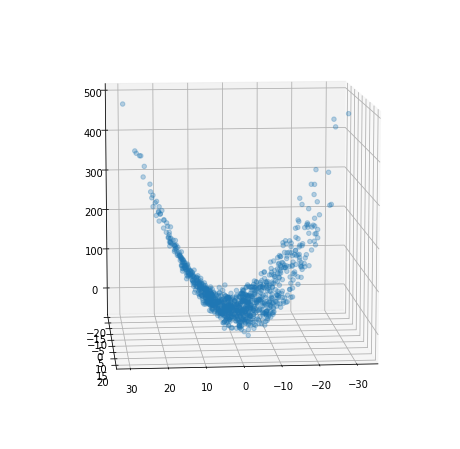

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,85)
ax.scatter(x1, x2, Y, alpha=0.3)
plt.show()
plt.close()

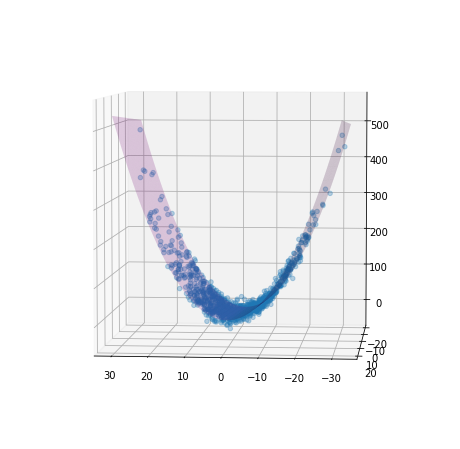

In [ ]:
z1, z2 = np.meshgrid(np.linspace(np.min(x1)-1.0, np.max(x1)+1.0, 100),
                     np.linspace(np.min(x2)-1.0, np.max(x2)+1.0, 100))
Z = beta_0 + beta_1*z1+ beta_2*z1**2 + beta_3*z2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5,95)
ax.scatter(x1, x2, Y, alpha=0.3)
ax.plot_surface(z1, z2, Z, color='purple', alpha=0.2)
plt.show()
plt.close()

In [ ]:
X = np.c_[np.ones(1000), x1,x2]
Betas = (np.linalg.inv((X.T)@X))@(X.T)@(Y)
Betas

array([52.67896454,  0.06837701,  0.77817577])

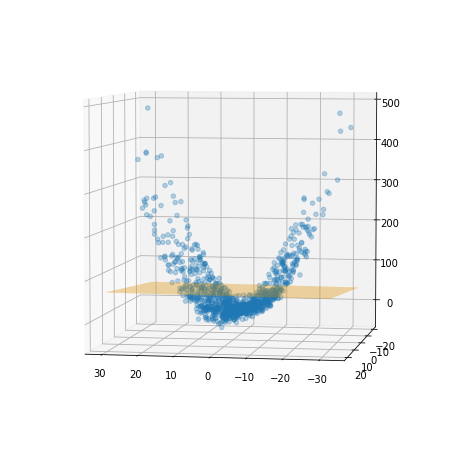

In [ ]:
Y_hat = Betas[0] + Betas[1]*x1+Betas[2]*x2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5,100)
Z =  Betas[0] + Betas[1]*z1+Betas[2]*z2
ax.plot_surface(z1, z2, Z, color='orange', alpha=0.4)
ax.scatter(x1, x2, Y, alpha=0.3)
plt.show()
plt.close()

Clearly, the model is underfitting the data. Plotting the residuals against the fitted values, there is clearly a pattern in the residuals which is a strong indication of nonlinearity in the response-predictor relationship. We can transform the predictors in an attempt to capture the this relationship. 

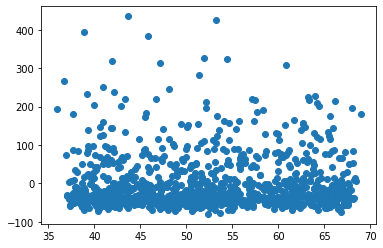

In [ ]:
plt.scatter(Y_hat , (Y-Y_hat))

In [ ]:
X = np.c_[np.ones(1000), x1,x1**2, x2, x2**2]
Betas = (np.linalg.inv((X.T)@X))@(X.T)@(Y)
Betas

array([0.18442914, 1.17398518, 0.52730046, 0.84606934, 0.0014906 ])

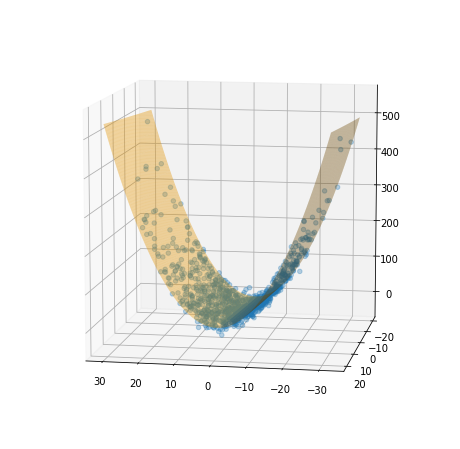

In [ ]:
Y_hat = Betas[0] + Betas[1]*x1+Betas[2]*x1**2+Betas[3]*x2+Betas[4]*x2**2
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,100)
ax.scatter(x1, x2, Y, alpha=0.3)
Z =  Betas[0] + Betas[1]*z1+Betas[2]*z1**2+Betas[3]*z2+Betas[4]*z2**2
ax.plot_surface(z1, z2, Z, color='orange', alpha=0.4)
plt.show()
plt.close()

### Detecting Outliers

In [ ]:
resids = Y-Y_hat
squared_resids = resids**2
var_estimate = (1/(1000-2-1))*squared_resids.sum()
var_estimate

91.02649393514788

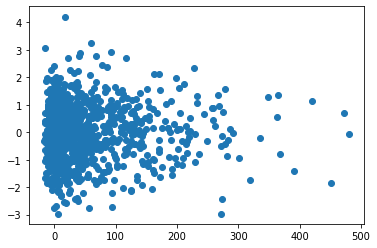

In [ ]:
hat_matrix = X@(np.linalg.inv((X.T)@X))@(X.T)
hat_values = np.diagonal(hat_matrix)
student_resids = resids/(np.sqrt(var_estimate*(1-hat_values)))
plt.scatter(Y_hat, student_resids)

### Collinearity

In [ ]:
x1 = x1- x1.mean() # center the data so that the mean is 0
x2 = x2-x2.mean()
X = np.c_[x1,x2]
sample_covar_matrix = (X.T@X)*(1/999)

In [ ]:
x1_std = np.std(x1, ddof=1)
x2_std = np.std(x2, ddof=1)
std_matrix = np.array([[x1_std**2, x1_std*x2_std],[x1_std*x2_std, x2_std**2]])

In [ ]:
sample_covar_matrix

array([[100.37261919,  -3.85044214],
       [ -3.85044214, 127.90850274]])

In [ ]:
std_matrix

array([[100.37261919, 113.30715528],
       [113.30715528, 127.90850274]])

In [ ]:
sample_covar_matrix/std_matrix

array([[ 1.        , -0.03398234],
       [-0.03398234,  1.        ]])

The two features are not correlated, so we don't have to worry about collinearity. Let's look at an example where the features are correlated. 

### Example: Collinearity

In [ ]:
x1 = normal(0,10,1000)
x2 = x1+uniform(-5,5,1000) # x1 and x2 are highly correlated
x3 = np.random.gamma(shape=2.0, scale=2.0, size=1000)
X = np.c_[x1,x2, x3]
x1_test = normal(0,10,1000)
x2_test = x1+uniform(-5,5,1000) # x1 and x2 are highly correlated
x3_test = np.random.gamma(shape=2.0, scale=5.0, size=1000)
X = np.c_[x1,x2, x3]
X_test = np.c_[x1_test, x2_test, x3_test]
np.corrcoef(X.T)

array([[ 1.        ,  0.95963705, -0.01650084],
       [ 0.95963705,  1.        , -0.01200912],
       [-0.01650084, -0.01200912,  1.        ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

We standardize the data so that $\frac{1}{1,000}\cdot X^TX$ is the sample covariance matrix

In [ ]:
scaler = StandardScaler().fit(X) # standardize the data
X = scaler.transform(X)
X_test = scaler.transform(X_test)
(X.T@X)*(1/1000) # since we standardize the features, the covariance matrix is the same as the correlation matrix

array([[ 1.        ,  0.95963705, -0.01650084],
       [ 0.95963705,  1.        , -0.01200912],
       [-0.01650084, -0.01200912,  1.        ]])

In [ ]:
beta_0, beta_1, beta_2, beta_3 = 0.5, 4.8, 2.7, -1.9
Y_determin = beta_0+beta_1*X[:,0]+beta_2*X[:,1]+beta_3*X[:,2]
Y = Y_determin + mvn(np.zeros(1000), 100.0*np.eye(1000))
Y_determin_test = beta_0+beta_1*X_test[:,0]+beta_2*X_test[:,1]+beta_3*X_test[:,2]
Y_test = Y_determin_test + mvn(np.zeros(1000), 100.0*np.eye(1000))

In [ ]:
np.linalg.inv((X.T@X)*(1/1000))*100.0 #covariance matrix for sampling distribution of Beta

array([[ 1264.67062185, -1213.54918832,     6.29446573],
       [-1213.54918832,  1264.50864645,    -4.83894077],
       [    6.29446573,    -4.83894077,   100.04575253]])

The values along the diagonal represent the variance of the estimate for each coefficient. Note that the coefficients of the highly correlated features have high variance. Consequently, any confidence interval estimate of the corresponding coefficient would be very wide, so we won't have much confidence in our estimate. 

In [ ]:
X = np.c_[np.ones(1000),X]
Betas = (np.linalg.inv((X.T)@X))@(X.T)@(Y) 
Betas

array([ 0.93729995,  4.99599916,  2.08500745, -1.20262797])

In [ ]:
Var_Beta = np.diagonal(np.linalg.inv((X.T)@X)*100)
std_Beta = np.sqrt(Var_Beta)
for i in range(0,4):
    print('The standard dev for the Sampling Dist for Beta'+str(i), round(std_Beta[i],4))
    print('A 95% confidence interval for Beta'+str(i), (round(Betas[i]-1.96*std_Beta[i],4), round(Betas[i]+1.96*std_Beta[i],4)))

The standard dev for the Sampling Dist for Beta0 0.3162
A 95% confidence interval for Beta0 (0.3175, 1.5571)
The standard dev for the Sampling Dist for Beta1 1.1246
A 95% confidence interval for Beta1 (2.7918, 7.2002)
The standard dev for the Sampling Dist for Beta2 1.1245
A 95% confidence interval for Beta2 (-0.119, 4.289)
The standard dev for the Sampling Dist for Beta3 0.3163
A 95% confidence interval for Beta3 (-1.8226, -0.5827)


Using these confidence intervals, depending on the simulated data, we may have reason to drop one of the highly correlated predictors. We drop the predictor for which the corresponding confidence interval above contains 0. When we do this, there is a negligible increase in training MSE, but a larger increase in test MSE. The result is that we could drop a feature which really does have predictive value because its relationship to the response is masked by the collinearity with another feature.

In [ ]:
X_test = np.c_[np.ones(1000), X_test]
Y_hat_train = X@Betas
print(np.mean((Y-Y_hat_train)**2))
Y_hat_test = X_test@Betas
print(np.mean((Y_test-Y_hat_test)**2))

98.13355346118446
100.2306591578923


In [ ]:
X_d = X[:,[0,1,3]]
Betas = (np.linalg.inv((X_d.T)@X_d))@(X_d.T)@(Y) 
print(Betas)
X_test_d = X_test[:, [0,1,3]]
Y_hat_train = X_d@Betas
print(np.mean((Y-Y_hat_train)**2))
Y_hat_test = X_test_d@Betas
print(np.mean((Y_test-Y_hat_test)**2))

[ 0.93729995  6.99698121 -1.1946492 ]
98.47734360214224
113.21271478768965
